In [2]:
pip install model_selectison

ERROR: Could not find a version that satisfies the requirement model_selectison (from versions: none)
ERROR: No matching distribution found for model_selectison
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss, confusion_matrix
import statistics

In [6]:
def load_and_preprocess_data(file_path):
    """
    Load data from JSON, select relevant columns, and balance the dataset.
    """
    data = pd.read_json(file_path)
    selected_columns = ['change_action', 'change_content_syntactic', 'diversity_action', 'diversity_content_syntactic', 'user_class']
    data = data[selected_columns]

    # Balance the dataset
    bot_data = data[data['user_class'] == 'bot']
    human_data = data[data['user_class'] == 'human']
    min_count = min(len(bot_data), len(human_data))
    balanced_data = pd.concat([bot_data.sample(min_count, random_state=42),
                               human_data.sample(min_count, random_state=42)])
    shuffled_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
    return shuffled_data

In [7]:
def calculate_stats(task, data, skip=True):
    if(not skip):
        content_mean = statistics.mean(data['content_syntactic'])
        action_mean = statistics.stdev(data['action'])
        content_std = statistics.mean(data['content_syntactic'])
        action_std = statistics.stdev(data['action'])
    else:
        if (task == "change"):
            print("change")
            content_mean = 0.6536864422297024
            action_mean = 0.46947384320607616
            content_std = 0.17527634862050348
            action_std = 0.11527244540217742
        else:
            print("diversity")
            content_mean = 0.659116834555024
            action_mean = 0.7055596029364635
            content_std = 0.1270876848391208
            action_std = 0.0617149037895202

    return content_mean, action_mean, content_std, action_std

In [8]:
def calculate_dynamic_score(task, data, content_weight, action_weight, content_mean, action_mean, content_std, action_std):
    """
    Calculate the change_dynamic_score for given weights and return the updated DataFrame.
    """
    data = data.copy()
    data[task] = (
        abs(content_weight * (data['content_syntactic'] - content_mean) / content_std) +
        abs(action_weight * (data['action'] - action_mean) / action_std)
    ) / (content_weight + action_weight)
    return data[task]

In [9]:
data = load_and_preprocess_data('../data/adjacent_change_processed/output_file.json')

In [10]:
tasks = ['change', 'diversity']

for task in tasks:
    selected_columns = pd.DataFrame()
    selected_columns['content_syntactic'] = data[f"{task}_content_syntactic"]
    selected_columns['action'] = data[f"{task}_action"]
    selected_columns['user_class'] = data['user_class']
    content_mean, action_mean, content_std, action_std = calculate_stats(task, selected_columns)
    data[task] = calculate_dynamic_score(task, selected_columns, 0.4, 0.6, content_mean, action_mean, content_std, action_std)

print(data.head())
data = data[data['change'] <4]
data = data[data['diversity'] < 5]

change
diversity
   change_action  change_content_syntactic  diversity_action  \
0       0.240843                  0.000000          0.733370   
1       0.578304                  0.913261          0.816009   
2       0.594944                  0.879401          0.755647   
3       0.564945                  0.136364          0.868267   
4       0.429588                  0.556876          0.861262   

   diversity_content_syntactic user_class    change  diversity  
0                     0.000000      human  2.681820   2.344902  
1                     0.882024        bot  1.158843   1.775384  
2                     0.797746      human  1.168187   0.923285  
3                     0.068068      human  1.677523   3.442154  
4                     0.800880        bot  0.428541   1.959951  


In [11]:
import matplotlib.pyplot as plt

def plot_with_class_labels(x, y, labels):
    """
    Plots a scatter plot of points with different colors/markers for each class label.
    
    Parameters:
    x (list or array): List of x-axis values (features).
    y (list or array): List of y-axis values (features).
    labels (list): List of class labels corresponding to each data point (e.g., 'bot', 'human').
    
    Returns:
    None: The function will display a scatter plot.
    """

    # Create a unique set of labels
    unique_labels = np.unique(labels)
    
    # Create a scatter plot with different colors for each label
    plt.figure(figsize=(10, 6))
    
    for label in unique_labels:
        # Filter the data points corresponding to the current label
        label_mask = (labels == label)
        if(label=='bot'):
            plt.scatter(x[label_mask], y[label_mask], label=label, alpha=0.5, s=2)
        else:
            plt.scatter(x[label_mask], y[label_mask], label=label, alpha=0.5, s=2)

    # Adding labels and title
    # plt.title('Scatter Plot with Class Labels')
    plt.xlabel('Change')
    plt.ylabel('Diversity')
    plt.legend(title="Class Labels")
    plt.grid(True)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


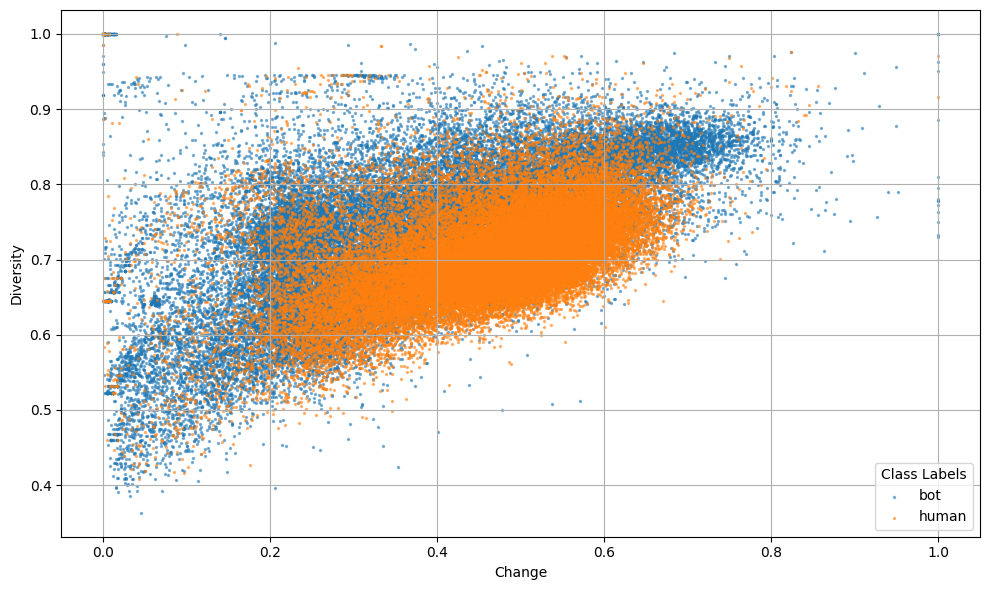

In [12]:
plot_with_class_labels(data['change_action'], data['diversity_action'], data['user_class'])

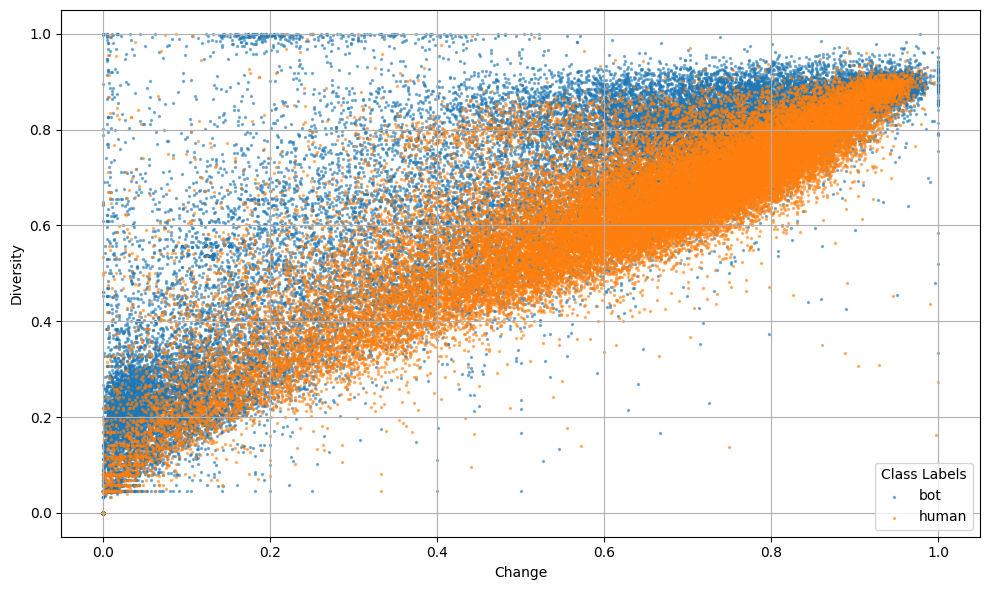

In [13]:
plot_with_class_labels(data['change_content_syntactic'], data['diversity_content_syntactic'], data['user_class'])

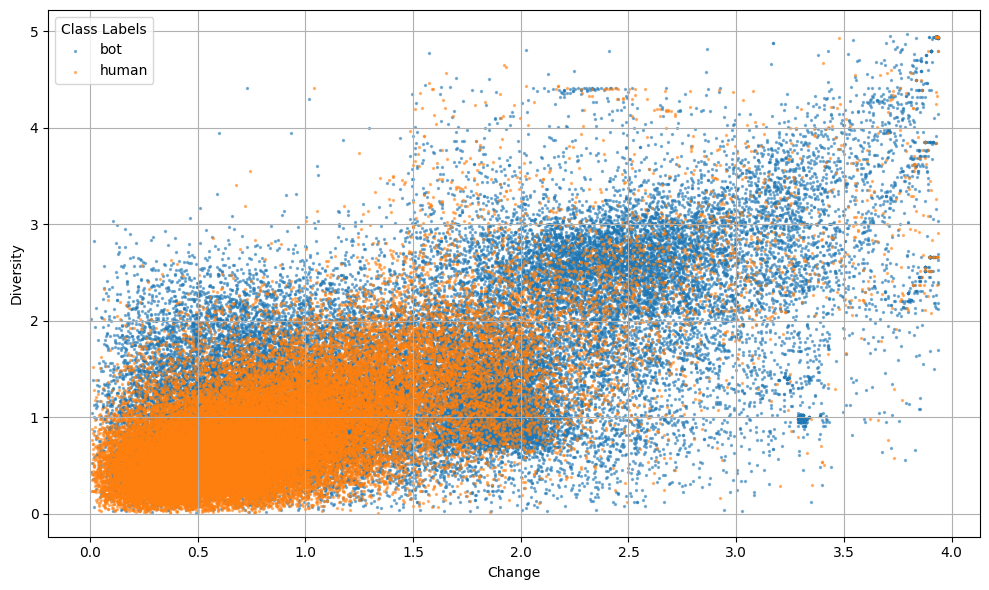

In [14]:
plot_with_class_labels(data['change'], data['diversity'], data['user_class'])

In [15]:
import matplotlib.pyplot as plt

def plot_histogram(data, column, bins=30, title="Histogram", xlabel="Values", ylabel="Frequency"):
    """
    Plots a histogram for the specified column in a DataFrame.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the data.
    - column (str): The column for which to plot the histogram.
    - bins (int): Number of bins in the histogram (default: 30).
    - title (str): Title of the plot (default: "Histogram").
    - xlabel (str): Label for the x-axis (default: "Values").
    - ylabel (str): Label for the y-axis (default: "Frequency").
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=bins, color='blue', edgecolor='black', alpha=0.7)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

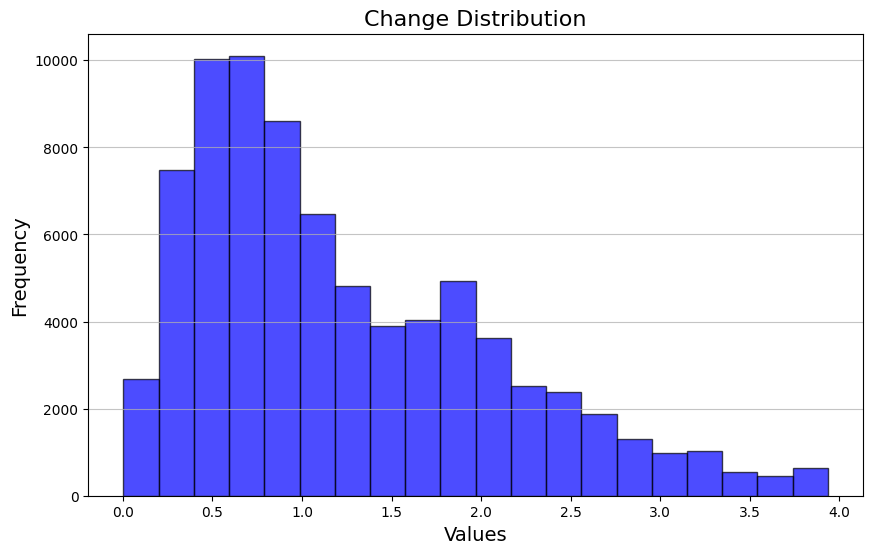

In [16]:
plot_histogram(data, column='change', bins=20, title="Change Distribution")

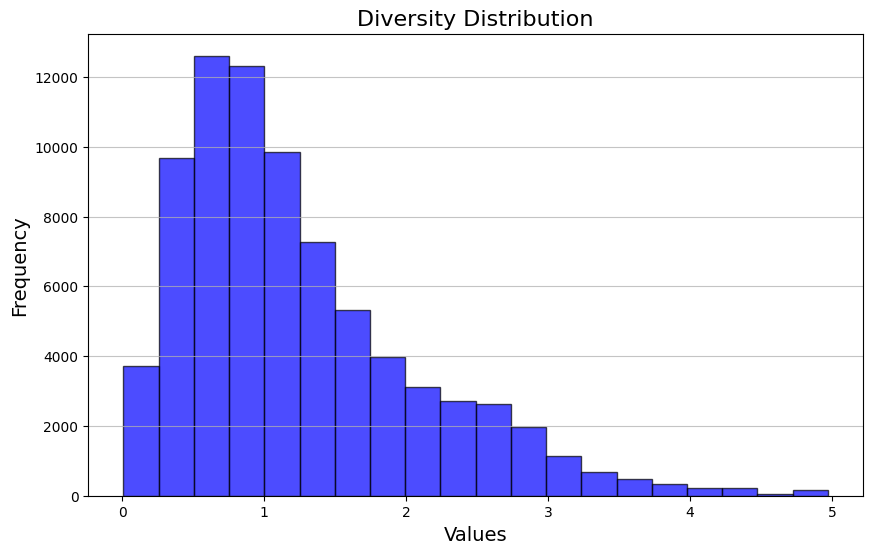

In [17]:
plot_histogram(data, column='diversity', bins=20, title="Diversity Distribution")